# Different linguistics features

In this notebook, I see what happens if we use different linguistic features with QVEC.

In [1]:
%matplotlib inline
import os
import csv
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data_path = '../../data'
tmp_path = '../../tmp'

/home/bacon/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Learnt embeddings

In [2]:
size = 50
fname = 'embeddings/glove.6B.{}d.txt'.format(size)
embedding_path = os.path.join(data_path, fname)
embeddings = pd.read_csv(embedding_path, sep=' ', header=None, index_col=0, quoting=csv.QUOTE_NONE).T

### QVEC model

In [3]:
def qvec(features, embeddings):
    """
    Returns correlations between columns of `features` and `embeddings`.
    
    The aligned feature is the one with the highest correlation.
    The qvec score is the sum of correlations of aligned features.
    """
    common_words = embeddings.columns.intersection(features.columns)
    S = features.loc[:,common_words]
    X = embeddings.loc[:,common_words]
    correlations = pd.DataFrame({i:X.corrwith(S.iloc[i], axis=1) for i in range(len(S))})
    correlations.columns = S.index
    return correlations

In [4]:
def qvec_for_large_features(features, embeddings, k=100):
    """
    Copy of `qvec` that only looks at most populated features.
    """
    common_words = embeddings.columns.intersection(features.columns)
    top_k_features = features.sum(axis=1).nlargest(k).index
    S = features.loc[top_k_features,common_words]
    X = embeddings.loc[:,common_words]
    correlations = pd.DataFrame({i:X.corrwith(S.iloc[i], axis=1) for i in range(len(S))})
    correlations.columns = S.index
    return correlations

### FrameNet - frame relations

In [46]:
fname = os.path.join(data_path, 'evaluation/framenet/framenet-normalized-relations.csv')
relations = pd.read_csv(fname, index_col=0)
relations.head()

,posse,find out,tun,mortification,reliance,monthly,pilfer,speak,jerk,weigh anchor,...,wet,jumble,honk,revelation,tenement,data,predestined,rainfall,recurrence,reminder
Abandonment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abounding_with,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Absorb_heat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abundance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abusing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
correlations = qvec_for_large_features(relations, embeddings, k=100)
V = len(embeddings.columns.intersection(relations.columns))
correlations.head()

,Event,Attributes,Gradable_attributes,Entity,Intentionally_act,Objective_influence,Transitive_action,Artifact,Emotion_directed,Stimulus_focus,...,Sex,Frequency,Offenses,Hair_configuration,Body_parts,Inclination,Mental_property,Killing,Measure_volume,Degree
1,0.053386,0.006283,0.006654,-0.035431,0.011792,0.061163,0.059212,-0.015493,0.059903,0.084889,...,-0.000433,-0.038209,0.027541,-0.015760,-0.014498,-0.019400,0.036537,0.066978,-0.016764,0.002340
2,0.020068,0.026799,0.025922,-0.026819,0.023027,0.021679,0.021729,-0.089428,-0.015061,0.003558,...,-0.008576,0.052207,0.011035,-0.030501,-0.014871,0.022788,-0.019313,0.044096,-0.005234,0.013058
3,-0.050918,0.096167,0.095667,-0.034676,-0.026607,-0.093753,-0.095684,-0.060056,0.144661,0.088227,...,-0.008396,0.030513,-0.022260,-0.032022,-0.070070,0.035010,0.037833,0.011462,-0.007272,0.007015
4,0.029395,0.004832,0.007174,-0.000181,0.027261,-0.008573,-0.008461,-0.016647,-0.055223,-0.007554,...,0.013929,0.038621,-0.004400,0.014907,-0.046595,0.001244,0.051820,0.006966,-0.017832,-0.016798
5,-0.064475,0.054016,0.055664,-0.018761,-0.024636,-0.041748,-0.043127,-0.021926,0.061602,0.025655,...,-0.004640,-0.000720,0.006987,-0.002379,0.004378,0.025932,0.052622,0.014012,-0.012129,0.009388


#### What dimensions and features are aligned?

In [48]:
alignments = pd.DataFrame(correlations.idxmax(axis=1))
alignments.columns = ['feature']
alignments['max_corr'] = correlations.max(axis=1)
alignments.sort_values(by='max_corr', ascending=False).head(10)

,feature,max_corr
122,People_by_vocation,0.233996
33,Event,0.191631
31,Locale,0.187433
192,Physical_entity,0.174204
102,Artifact,0.159618
255,Biological_entity,0.157401
188,Artifact,0.156281
294,Clothing,0.154130
199,Event,0.147957
286,Entity,0.147833


In [54]:
alignments['feature'].value_counts().to_frame().head()

,feature
Event,22
Emotion_directed,20
Locale,18
People_by_vocation,15
Clothing,14


#### What is QVEC doing?

In [49]:
common_words = embeddings.columns.intersection(relations.columns)
S = relations[common_words]
X = embeddings[common_words]
def plot(i, j, X=X, S=S):
    """Plot ith dimension of embeddings against feature j."""
    x = X.loc[i]
    s = S.loc[j]
    sns.jointplot(x, s);

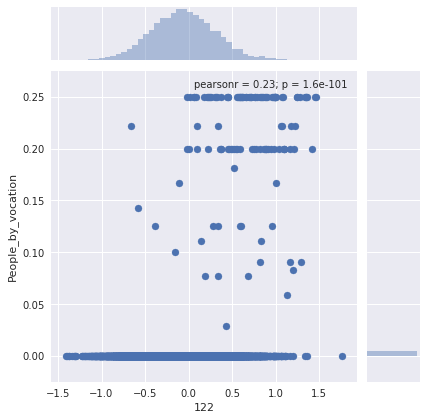

In [50]:
plot(122,'People_by_vocation')

#### Top K words

In [29]:
def highest_value(i, k=20, X=X):
    """Return the top `k` words with highest values for ith dimension in X."""
    dim = X.loc[i]
    return dim.nlargest(n=k).index

In [42]:
k = 10
largest = pd.DataFrame([highest_value(i, k) for i in alignments.index], index=alignments.index)
top_k = pd.merge(alignments, largest, left_index=True, right_index=True)
top_k.sort_values(by='max_corr', ascending=False).head(10)

,feature,max_corr,0,1,2,3,4,5,6,7,8,9
122,People_by_vocation,0.233996,amateur,archaeologist,anthropologist,physician,educational,chemist,mathematician,linguist,politician,legislator
33,Event,0.191631,maim,affray,neutral,pursue,lave,discontinue,yen,defraud,oust,obstruct
31,Locale,0.187433,parkway,canyon,byway,ordnance,moraine,park,museum,sari,historic,saint
192,Physical_entity,0.174204,basin,estuary,drain,saute,cheese,fat,creek,sheet,river,pasta
102,Artifact,0.159618,vest,belt,shootout,slipper,manhunt,studded,windshield,cap,trek,prehistoric
255,Biological_entity,0.157401,soldier,writer,journalist,army,farmer,man,father,disease,son,yard
188,Artifact,0.156281,pee,kilo,grenade,bra,bow,curtsy,renounce,crucify,submarine,one-piece
294,Clothing,0.154130,actionable,crisscross,littered,shoelace,gown,jug,dress,sweat,tile,glittering
199,Event,0.147957,teaspoon,guru,maharaja,grated,liquidate,freeway,dehydrate,sh,frisk,hatted
286,Entity,0.147833,apartment,milk,dressed,lung,hooded,township,mosque,avenue,annual,butter


In [43]:
def get_dims(feature, df=top_k):
    """Return the dimensions aligned with `feature` in `df`."""
    return df[df['feature']==feature].sort_values(by='max_corr', ascending=False)

get_dims('Transitive_action').head()

,feature,max_corr,0,1,2,3,4,5,6,7,8,9
204,Transitive_action,0.123995,shave,refresh,alb,abstain,paste,bake,expedition,forbearance,casserole,siege
265,Transitive_action,0.122797,bitty,billions,expend,reprocess,littered,drawer,embezzle,hallucinogen,scrap,tumbler
74,Transitive_action,0.120047,canyon,stenosis,saddened,congeal,unzip,plunk,daft,boulevard,dodge,wound
173,Transitive_action,0.095787,punctually,runway,by-pass,ablution,tuckered,kilometer,qv,cave,spinney,basilica
274,Transitive_action,0.089790,ramekin,annihilate,endangerment,medley,detonate,crackers,deceptive,contravention,adhere,violate


In [53]:
get_dims('Gradable_attributes')

,feature,max_corr,0,1,2,3,4,5,6,7,8,9
124,Gradable_attributes,0.135449,rotten,jobless,exceed,dewy,quieten,scorn,depravity,plaster,ceiling,creep
284,Gradable_attributes,0.129936,ailment,arthritis,respire,flagellate,randy,solder,muscular,hospitalize,clot,simper
106,Gradable_attributes,0.113910,tolerant,stable,cirrhosis,collude,respectful,garbed,methane,abiding,clot,supporter
142,Gradable_attributes,0.097226,whimper,mew,circlet,commendation,combatant,stupidly,disobey,garnish,crosswalk,ungenerous
241,Gradable_attributes,0.095478,overfilled,contractual,backpack,contraption,dormitory,utensil,hairpiece,hunch,fishy,boater
22,Gradable_attributes,0.089498,funny,charming,flatter,beautiful,articulate,song,dude,guy,thickset,thoughtful
283,Gradable_attributes,0.086753,mishap,drowsiness,espy,torrential,mechanical,leak,parkway,maltreat,highway,fumble
86,Gradable_attributes,0.069228,palazzo,basilica,adhesion,dune,recurring,recurrent,exalt,bony,acropolis,sorrowful


## Universal dependencies

In [24]:
fname = 'evaluation/dependency/UD_English/en-ud-features.csv'
path = os.path.join(data_path, fname)
ud = pd.read_csv(path)
ud.head(20)

/home/bacon/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,form,lemma,universal_pos,lg_pos,Case,Definite,Degree,Foreign,Gender,Mood,NumType,Number,Person,Poss,PronType,Reflex,Tense,VerbForm,Voice
0,Al,Al,PROPN,NNP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-,-,PUNCT,HYPH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaman,Zaman,PROPN,NNP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,:,:,PUNCT,:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,American,american,ADJ,JJ,NaN,NaN,Pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,forces,force,NOUN,NNS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,killed,kill,VERB,VBD,NaN,NaN,NaN,NaN,NaN,Ind,NaN,NaN,NaN,NaN,NaN,NaN,Past,Fin,NaN
7,Shaikh,Shaikh,PROPN,NNP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Abdullah,Abdullah,PROPN,NNP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,al,al,PROPN,NNP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
